# Visu 8: Width histogram

# Setup

In [29]:
import os
import matplotlib.pyplot as plt
import random
import json
import pandas as pd
import numpy as np

from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

# I/ Close up

## C2 (x100)

### Presentation

**Data**:
106 pictures taken at 100x magnification of hyphae in one plate.\
All types of hyphea (big runner, runner, bas, ..) are represented.\
The width is then labeled with `labelme`.

**Plate**:
The plate is plate number 1050.\
It is of strain C2. Treatment is 100C.\
The crossing was observed on 09/05.
The measurements were made on 13/05.

**Conclusion**:
Values go from 2.3 to 12.5 micrometers.\
Median is 4.7 micrometers.

### Plate overview

### Get data

Fetch segments

In [50]:
source = os.path.join(storage_path, "plate1050_width")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments[file] = shape["points"]

Convert setgment to width

In [51]:
labels = {}

for key in segments.keys():
    point1 = np.array(segments[key][0])
    point2 = np.array(segments[key][1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=100
            )
    labels[key] = length

### Data visualisation

In [52]:
values = [labels[key] for key in labels.keys()]

<IPython.core.display.Javascript object>


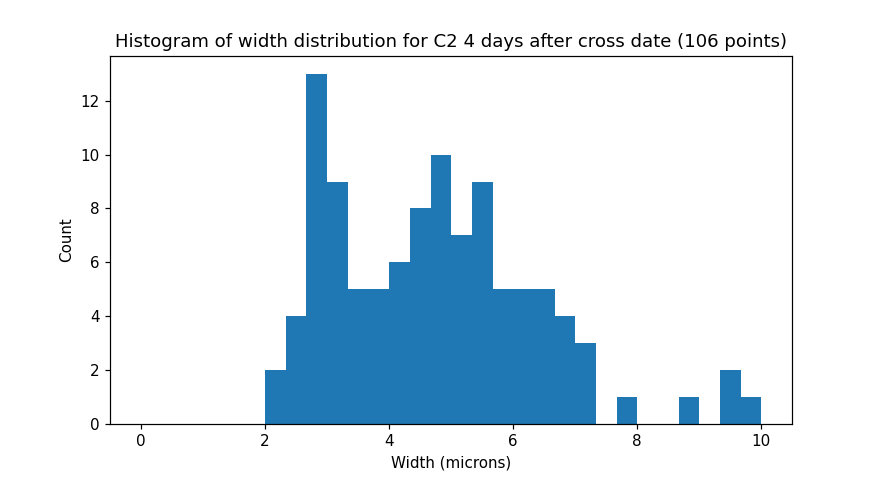

Text(0.5, 1.0, 'Histogram of width distribution for C2 4 days after cross date (106 points)')

In [53]:
plt.hist(values, bins = 30, range = (0, 10))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for C2 4 days after cross date (106 points)")

In [55]:
serie = pd.Series(values)

In [56]:
serie.describe()

count    106.000000
mean       4.819916
std        1.801394
min        2.281621
25%        3.308409
50%        4.714272
75%        5.755497
max       12.520470
dtype: float64

## Agg (x50)

### Presentation

**Data**:\
Pictures taken at **50x** magnification of hyphae in one plate.\
The width is then labeled with `labelme`.\
In each image we measure all hyphas that are focused enough.

**Plate**:\
The plate is plate number 28.\
It is of strain Aggregatum.\
The crossing was observed on 03/06.\
The measurements were made on 14/06.

**Conclusion**:\
Values range from 2.1 to 6.2 micrometers.\
The mean is 3.5 micrometer and the median is 3.

### Get data

Fetch segments

In [43]:
source = os.path.join(storage_path, "BAS_WIDTH", "20220614_Plate0028")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        segments[file] = []
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments[file].append(shape["points"])

In [44]:
labels = []

for key in segments.keys():
    for point in segments[key]:
        point1 = np.array(point[0])
        point2 = np.array(point[1])
        length = convert_to_micrometer(
                    np.linalg.norm(point1 - point2), magnification=50
                )
        labels.append(length)

### Data visualisation

In [45]:
len(labels)

67

<IPython.core.display.Javascript object>


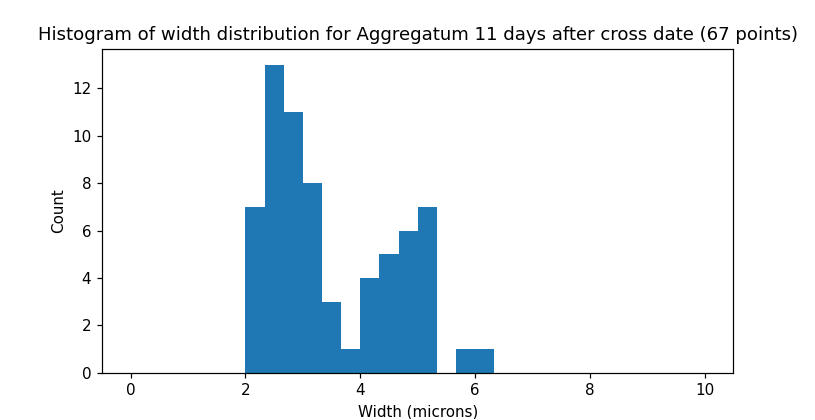

Text(0.5, 1.0, 'Histogram of width distribution for Aggregatum 11 days after cross date (67 points)')

In [49]:
%matplotlib notebook
plt.hist(labels, bins = 30, range = (0, 10))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for Aggregatum 11 days after cross date (67 points)")

In [47]:
serie = pd.Series(labels)

In [48]:
serie.describe()

count    67.000000
mean      3.494044
std       1.089859
min       2.084603
25%       2.596065
50%       3.010758
75%       4.399466
max       6.189429
dtype: float64

# Prince x2 images

## Setup

In [85]:
def fetch_label(path_to_labels):
    def is_valid(name):
        return ".json" in name

    segments_new = []
    for file in os.listdir(path_to_labels):
        if is_valid(file):
            path = os.path.join(path_to_labels, file)
            with open(path) as f:
                json_from_file = json.load(f)
            for shape in json_from_file["shapes"]:
                if shape["label"] == "width":
                    segments_new. append(shape["points"])
    return segments_new

In [86]:
def convert_segments_to_width(segments_new):
    labels = []
    for segment in segments_new:
        point1 = np.array(segment[0])
        point2 = np.array(segment[1])
        length = convert_to_micrometer(
                    np.linalg.norm(point1 - point2), magnification=2
                )
        labels.append(length)
    return labels

## C2 (x2)

### Presentation

Both plate are C2

**Old plate**\
Cross date: 05/06/22\
Measure date: 27/05\
It is 22 days old.\
Treatment: 200C
It has 70 points.

**New plate**\
Is a plate that crossed recently.\
Measure date: 27/05\
Cross date: 25/05\
Treatment: 100C.
It is 2 days old.\
It has 150 points.

**Conclusion**\
The values range between 2.4 and 15.2 for old plate and between 2.5 and 7.8 for the new plate.\
Which makes sense that the older plate would have some thicker hyphas.\
Most values are found between 3 and 8 micrometers.\
Those values are consistent with the values observed on the plate at 100x.

In [96]:
old_plate = os.path.join(storage_path, "labels_precise", "20220527_0153_Plate08", "Img")
new_plate = os.path.join(storage_path, "labels_precise", "20220527_0332_Plate01", "Img")

### Old plate

In [97]:
segments_new = fetch_label(old_plate)
labels = convert_segments_to_width(segments_new)

In [98]:
len(labels)

70

<IPython.core.display.Javascript object>


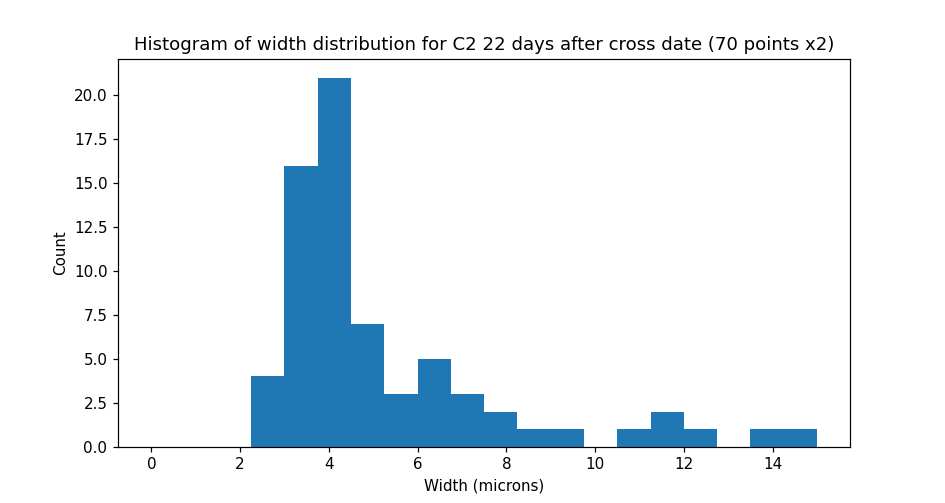

Text(0.5, 1.0, 'Histogram of width distribution for C2 22 days after cross date (70 points x2)')

In [100]:
%matplotlib notebook
plt.hist(labels, bins = 20, range = (0, 15))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for C2 22 days after cross date (70 points x2)")

In [103]:
serie = pd.Series(labels)

In [104]:
serie.describe()

count    70.000000
mean      5.454233
std       2.941387
min       2.392054
25%       3.688637
50%       4.210676
75%       6.117486
max      15.239551
dtype: float64

### Young plate

In [105]:
segments_new = fetch_label(new_plate)
labels = convert_segments_to_width(segments_new)

In [106]:
len(labels)

154

<IPython.core.display.Javascript object>


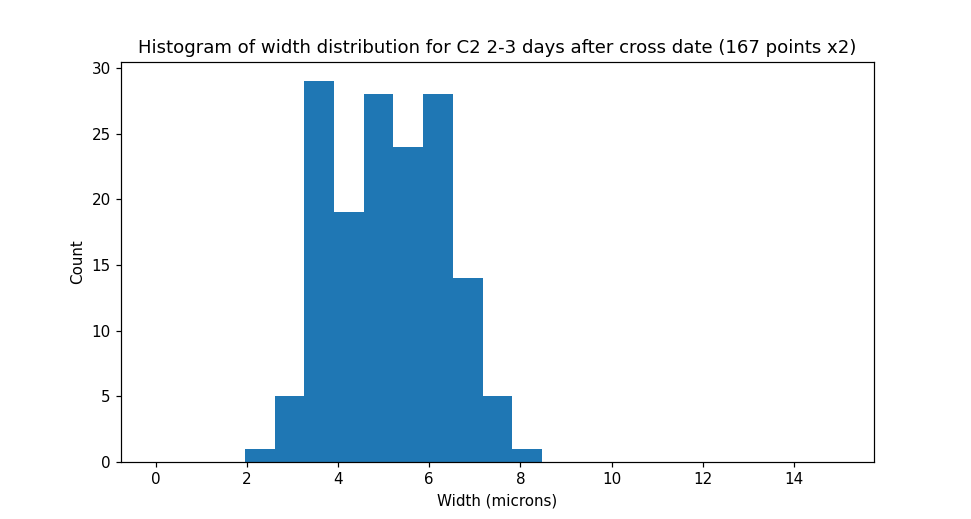

Text(0.5, 1.0, 'Histogram of width distribution for C2 2-3 days after cross date (167 points x2)')

In [107]:
plt.hist(labels, bins = 23, range = (0, 15))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for C2 2-3 days after cross date (167 points x2)")

In [108]:
serie = pd.Series(labels)

In [109]:
serie.describe()

count    154.000000
mean       5.087088
std        1.228165
min        2.511638
25%        4.015949
50%        5.113234
75%        6.162500
max        7.837271
dtype: float64

## Agg (x2)

In [132]:
old_plate = os.path.join(storage_path, "labels_precise", "20220527_0251_Plate27", "Img")
new_plate = os.path.join(storage_path, "labels_precise", "20220531_0455_Plate10", "Img")
medium_plate = os.path.join(storage_path, "labels_precise", "20220512_0326_Plate09", "Img")

### Presentation

20220527_0251_Plate27: Agg 16 old\
20220531_0455_Plate10: Agg 22 new\
20220512_0326_Plate09: Agg 31 medium

Three plates are Agg 100C

**Old plate**\
Plate number 016.\
Cross date: 19/04.\
Image date: 27/05\
It crossed 38 days before pictures.\
It has 30 points.

**Medium plate**\
Plate number: 31\
Cross date: 28/04\
Image date: 12/05
It crossed 14 days before pictures.
It has ? points.

**Recent plate**\
Plate number: 22\
Cross date: 22/05\
Image date: 31/05\
It crossed 9 days before pictures.\
It has ? points.

### Old plate

In [144]:
segments_new = fetch_label(old_plate)
labels = convert_segments_to_width(segments_new)

In [145]:
len(labels)

30

<IPython.core.display.Javascript object>


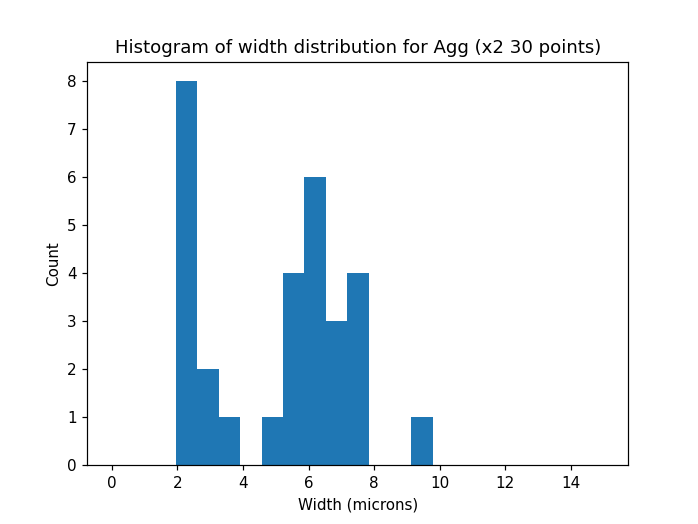

Text(0.5, 1.0, 'Histogram of width distribution for Agg (x2 30 points)')

In [146]:
plt.hist(labels, bins = 23, range = (0, 15))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for Agg 38 days after crossing (x2 30 points)")

In [139]:
serie = pd.Series(labels)

In [140]:
serie.describe()

count    30.000000
mean      5.090694
std       2.192134
min       2.077175
25%       2.640302
50%       5.753581
75%       6.681422
max       9.530278
dtype: float64

### Young plate

In [147]:
segments_new = fetch_label(medium_plate)
labels = convert_segments_to_width(segments_new)

In [148]:
len(labels)

94

<IPython.core.display.Javascript object>


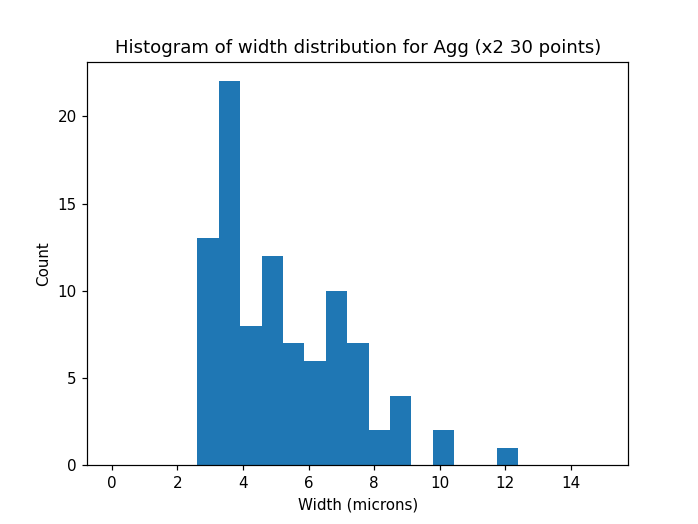

Text(0.5, 1.0, 'Histogram of width distribution for Agg (x2 30 points)')

In [149]:
plt.hist(labels, bins = 23, range = (0, 15))
plt.ylabel("Count")
plt.xlabel("Width (microns)")
plt.title("Histogram of width distribution for Agg 14 days after crossing (x2 94 points)")

In [129]:
serie = pd.Series(labels)

In [130]:
serie.describe()

count    94.000000
mean      5.200225
std       1.989996
min       2.694536
25%       3.473509
50%       4.690593
75%       6.735203
max      12.194681
dtype: float64